<a href="https://colab.research.google.com/github/eric157/Machine-Learners/blob/main/Classification_T5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Text Based Classification for Predicting E-Commerce Product Category**




**Group Members:**


    





1. 202418013 - Darshita Dwivedi
2. 202418025 - Kelvi Bhesdadiya
3. 202418057 - Eric Thomas
4. 202418058 - Ujjwal Bhansali   





Importing essential libraries for data manipulation , preprocessing , classification models , evaluation metrics and visualization

In [ ]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc,f1_score)
from sklearn.preprocessing import label_binarize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ericp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ericp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**The dataset used in this project is sourced from Kaggle: https://www.kaggle.com/datasets/lokeshparab/amazon-products-dataset**


In [ ]:
df = pd.read_csv('Amazon-Products.csv')

**The dataset is of Amazon-Product-Details from 2023**

We will predictiing 'main_category' using the text of 'name'

In [ ]:
df

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"
...,...,...,...,...,...,...,...,...,...,...
551580,1099,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,https://m.media-amazon.com/images/I/71tHAR9pIY...,https://www.amazon.in/Adidas-Regular-Mens-Trac...,3.2,9,"₹3,449","₹4,599"
551581,1100,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41pKrMZ5lQ...,https://www.amazon.in/Redwolf-Noice-Smort-Cott...,2.0,2,"₹1,199","₹1,999"
551582,1101,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41n9u+zNSc...,https://www.amazon.in/Redwolf-Schrute-Farms-Ho...,4.0,1,"₹1,199","₹1,999"
551583,1102,Puma Men Shorts,sports & fitness,Yoga,https://m.media-amazon.com/images/I/51LoWv5JDt...,https://www.amazon.in/Puma-Woven-Short-5208526...,4.4,37,NaN,NaN


Dropping Columns which are not helpful for the purpose

In [ ]:
df.drop(columns=['Unnamed: 0','image','link','no_of_ratings', 'ratings', 'discount_price', 'actual_price','sub_category'], inplace=True)

In [ ]:
df

,name,main_category
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances
...,...,...
551580,Adidas Regular Fit Men's Track Tops,sports & fitness
551581,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness
551582,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness
551583,Puma Men Shorts,sports & fitness


In [ ]:
print(f"The number of rows : {df.shape[0]} and the number of column : {df.shape[1]}")

The number of rows : 551585 and the number of column : 2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   name           551585 non-null  object
 1   main_category  551585 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


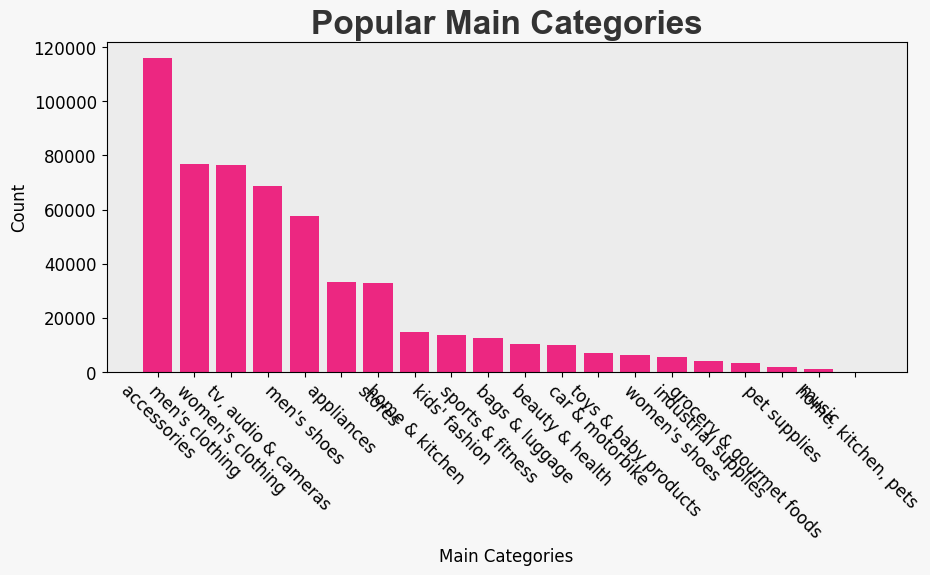

In [ ]:
category_counts = df['main_category'].value_counts().reset_index()
category_counts.columns = ['main_category', 'count']
category_counts = category_counts.sort_values(by='count', ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(category_counts['main_category'], category_counts['count'], color='#EC2781')

ax.set_title('Popular Main Categories', fontsize=24, fontfamily='Arial', color='#333', fontweight='bold')
ax.set_xlabel('Main Categories', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

plt.xticks(rotation=-45, fontsize=12)
plt.yticks(fontsize=12)

plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.3)

fig.patch.set_facecolor('#F7F7F7')
ax.set_facecolor('#ECECEC')

plt.show()

We identified the top 5 categories by analyzing the frequency of occurrences in the `main_category` column.

The dataset was then filtered to include only these categories, and the index was reset accordingly.

In [ ]:
category_counts = df['main_category'].value_counts()
top_categories = category_counts.nlargest(5).index
df = df[df['main_category'].isin(top_categories)]
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,name,main_category
0,"Redmi 10 Power (Power Black, 8GB RAM, 128GB St...","tv, audio & cameras"
1,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM,...","tv, audio & cameras"
2,OnePlus Bullets Z2 Bluetooth Wireless in Ear E...,"tv, audio & cameras"
3,"Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...","tv, audio & cameras"
4,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...","tv, audio & cameras"
...,...,...
395419,RARE Women Casual Dress,women's clothing
395420,eWools Women's Wool Round Neck Cardigan,women's clothing
395421,AND Women's Regular Fit Top,women's clothing
395422,AMERICAN CREW Women's Slim Fit Jeans,women's clothing


In [ ]:
df.isnull().sum()

name             0
main_category    0
dtype: int64

By converting all text data to lowercase, we standardize the text, making it easier to work with during text vectorization, where case sensitivity can cause inconsistencies. For example, "Redmi 10 Power" and "redmi 10 power" would be treated as two different entities without this step. After applying the applymap function, all the text data in the name and main_category columns will be in lowercase, ensuring uniformity.

In [ ]:
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df

C:\Users\ericp\AppData\Local\Temp\ipykernel_13072\1832992705.py:1: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,name,main_category
0,"redmi 10 power (power black, 8gb ram, 128gb st...","tv, audio & cameras"
1,"oneplus nord ce 2 lite 5g (blue tide, 6gb ram,...","tv, audio & cameras"
2,oneplus bullets z2 bluetooth wireless in ear e...,"tv, audio & cameras"
3,"samsung galaxy m33 5g (mystique green, 6gb, 12...","tv, audio & cameras"
4,"oneplus nord ce 2 lite 5g (black dusk, 6gb ram...","tv, audio & cameras"
...,...,...
395419,rare women casual dress,women's clothing
395420,ewools women's wool round neck cardigan,women's clothing
395421,and women's regular fit top,women's clothing
395422,american crew women's slim fit jeans,women's clothing


The name column is being cleaned by removing all punctuation using the str.replace method with a regex pattern that matches any punctuation character This step is crucial for text vectorization as punctuation can introduce noise in the data and lead to inconsistencies in the feature representation

For example product names like "OnePlus Nord CE 2 Lite 5G (Blue Tide)" and "OnePlus Nord CE 2 Lite 5G - Blue Tide" could be treated differently by the model. Removing punctuation ensures that both are represented the same way, improving the quality of the vectorization

In [ ]:
df['name'] = df['name'].str.replace(f"[{string.punctuation}]", "", regex=True)
df

,name,main_category
0,redmi 10 power power black 8gb ram 128gb storage,"tv, audio & cameras"
1,oneplus nord ce 2 lite 5g blue tide 6gb ram 12...,"tv, audio & cameras"
2,oneplus bullets z2 bluetooth wireless in ear e...,"tv, audio & cameras"
3,samsung galaxy m33 5g mystique green 6gb 128gb...,"tv, audio & cameras"
4,oneplus nord ce 2 lite 5g black dusk 6gb ram 1...,"tv, audio & cameras"
...,...,...
395419,rare women casual dress,women's clothing
395420,ewools womens wool round neck cardigan,women's clothing
395421,and womens regular fit top,women's clothing
395422,american crew womens slim fit jeans,women's clothing


Removing stopwords in text classification is important because these common words ("the", "and", "is" etc) do not carry significant meaning or contribute to distinguishing between different classes
By filtering them out, we reduce noise in the data improve the models focus on meaningful and relevant features and enhance the overall performance of text classification algorithms. This step also helps reduce the dimensionality of the feature space making models more efficient and interpretable

In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  if isinstance(text, str):
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)
  return text

df = df.applymap(remove_stopwords)
df

C:\Users\ericp\AppData\Local\Temp\ipykernel_13072\794485616.py:10: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,name,main_category
0,redmi 10 power power black 8gb ram 128gb storage,"tv, audio & cameras"
1,oneplus nord ce 2 lite 5g blue tide 6gb ram 12...,"tv, audio & cameras"
2,oneplus bullets z2 bluetooth wireless ear earp...,"tv, audio & cameras"
3,samsung galaxy m33 5g mystique green 6gb 128gb...,"tv, audio & cameras"
4,oneplus nord ce 2 lite 5g black dusk 6gb ram 1...,"tv, audio & cameras"
...,...,...
395419,rare women casual dress,women's clothing
395420,ewools womens wool round neck cardigan,women's clothing
395421,womens regular fit top,women's clothing
395422,american crew womens slim fit jeans,women's clothing


By applying the lemmatize_text function, we ensure that all word forms are normalized, allowing the classification model to focus on the core concepts rather than being distracted by grammatical variations

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
  if isinstance(text, str):
    tokens = text.split()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)
  return text

df = df.applymap(lemmatize_text)
df

C:\Users\ericp\AppData\Local\Temp\ipykernel_13072\2348804158.py:10: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,name,main_category
0,redmi 10 power power black 8gb ram 128gb storage,"tv, audio & camera"
1,oneplus nord ce 2 lite 5g blue tide 6gb ram 12...,"tv, audio & camera"
2,oneplus bullet z2 bluetooth wireless ear earph...,"tv, audio & camera"
3,samsung galaxy m33 5g mystique green 6gb 128gb...,"tv, audio & camera"
4,oneplus nord ce 2 lite 5g black dusk 6gb ram 1...,"tv, audio & camera"
...,...,...
395419,rare woman casual dress,women's clothing
395420,ewools womens wool round neck cardigan,women's clothing
395421,womens regular fit top,women's clothing
395422,american crew womens slim fit jean,women's clothing


We use TF-IDF (Term Frequency-Inverse Document Frequency) to convert product names into numerical features for text classification

TF-IDF not only counts how often each word appears in a document but also considers how rare that word is across all documents emphasizing relevant words while minimizing the impact of common ones

This approach is preferable to Count Vectorization which can skew results by over-representing frequently occurring words

By using TF-IDF we create a more meaningful representation of the text data that enhances our classification model's performance

In [ ]:
tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split(), max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['name'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df = pd.concat([df, tfidf_df], axis=1)
df

c:\Users\ericp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



,name,main_category,1,10,100,1080p,11,12,13,14,...,zari,zaveri,zebronics,zeya,zip,zipper,zircon,zirconia,zoom,–
0,redmi 10 power power black 8gb ram 128gb storage,"tv, audio & camera",0.0,0.292572,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,oneplus nord ce 2 lite 5g blue tide 6gb ram 12...,"tv, audio & camera",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,oneplus bullet z2 bluetooth wireless ear earph...,"tv, audio & camera",0.0,0.242919,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,samsung galaxy m33 5g mystique green 6gb 128gb...,"tv, audio & camera",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,oneplus nord ce 2 lite 5g black dusk 6gb ram 1...,"tv, audio & camera",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395419,rare woman casual dress,women's clothing,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
395420,ewools womens wool round neck cardigan,women's clothing,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
395421,womens regular fit top,women's clothing,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
395422,american crew womens slim fit jean,women's clothing,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Visualization of Vectorized Text**

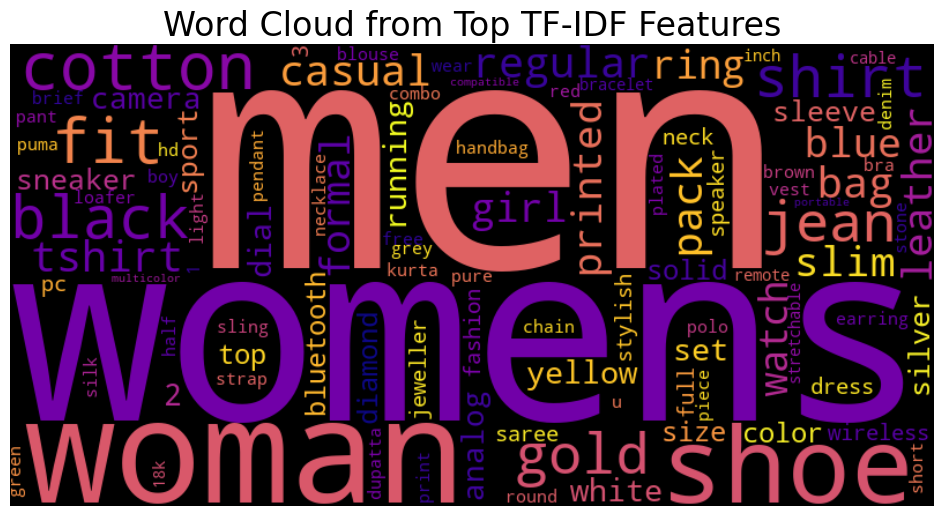

In [ ]:
top_n = 100
top_features = tfidf_df.sum(axis=0).nlargest(top_n)
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='plasma',
    contour_color='white',
    contour_width=1,
    random_state=42,
    prefer_horizontal=0.9,
    normalize_plurals=True,
).generate_from_frequencies(top_features)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from Top TF-IDF Features', fontsize=24, color='Black')
plt.show()

**Applied PCA to reduce the TF-IDF vectorized dataset to three principal components and to visualize the data effectively in a 3D scatter plot**

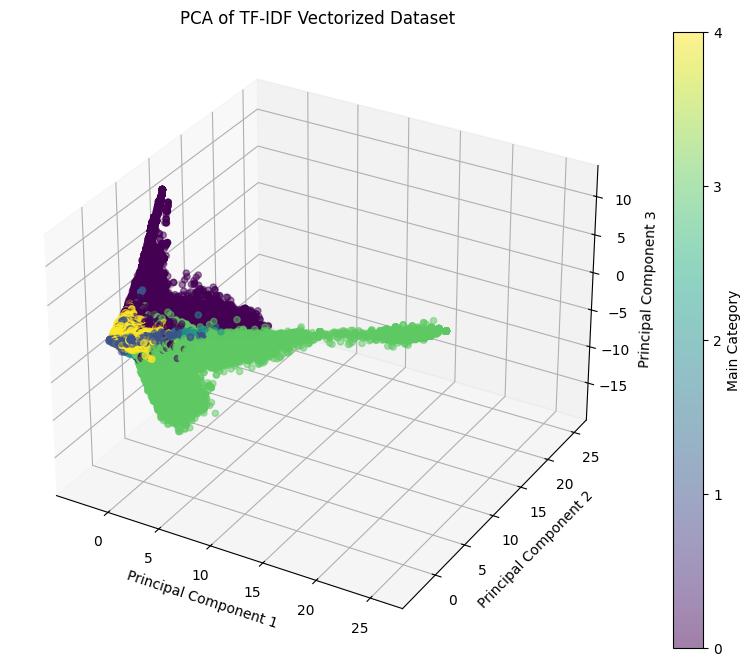

In [ ]:
X = df.iloc[:, 2:]
y = df['main_category']
X_standardized = StandardScaler().fit_transform(X)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_standardized)
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['main_category'] = y

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['main_category'].astype('category').cat.codes, cmap='viridis', alpha=0.5)

cbar = plt.colorbar(scatter, ticks=range(len(y.unique())), label='Main Category', format='%d')
cbar.set_label('Main Category')

ax.set_title('PCA of TF-IDF Vectorized Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.grid()
plt.show()

# **Modeling**

In [ ]:
df.drop(columns=['name'], inplace=True)

In [ ]:
X = df.drop('main_category', axis=1)
y = df['main_category']

In [ ]:
X.shape, y.shape

((395424, 999), (395424,))

Split the data into training, validation, and test sets using stratified sampling to maintain the same class distribution across all sets

This approach helps ensure that our model is trained and tested on representative samples, which can lead to better performance and generalization to new data.

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, random_state=42, stratify=y_train_val)

**Model 1: Logistic Regession**

Applied cross-validation to check for overfitting or underfitting

Various metrics such as validation accuracy, test accuracy, precision, recall, F1 score, and specificity were calculated to assess the model's performance

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

log_reg.fit(X_train, y_train)

val_accuracy = log_reg.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")

test_accuracy = log_reg.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy_log_reg)

precision_log_reg = precision_score(y_test, y_pred_log_reg, average='weighted')
print("Logistic Regression Precision:", precision_log_reg)

recall_log_reg = recall_score(y_test, y_pred_log_reg, average='weighted')
print("Logistic Regression Recall:", recall_log_reg)

f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted')
print("Logistic Regression F1 Score:", f1_log_reg)

cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
tn_log_reg = cm_log_reg[0, 0]
fp_log_reg = cm_log_reg[0, 1]
specificity_log_reg = tn_log_reg / (tn_log_reg + fp_log_reg) if (tn_log_reg + fp_log_reg) > 0 else 0
print("Logistic Regression Specificity:", specificity_log_reg)

Cross-Validation Scores: [0.98126091 0.98109003 0.98087191]
Mean CV Accuracy: 0.9811
Validation Accuracy: 0.9814
Test Accuracy: 0.9815
Logistic Regression Accuracy: 0.9814632172571631
Logistic Regression Precision: 0.981482194283721
Logistic Regression Recall: 0.9814632172571631
Logistic Regression F1 Score: 0.9814653528161676
Logistic Regression Specificity: 0.9992996585835595


The Logistic Regression model demonstrated excellent performance with a test accuracy of 98.15% high precision and recall of 98.15% an F1 score of 98.15%, and outstanding specificity of 99.93% indicating its effectiveness in accurately classifying the main category

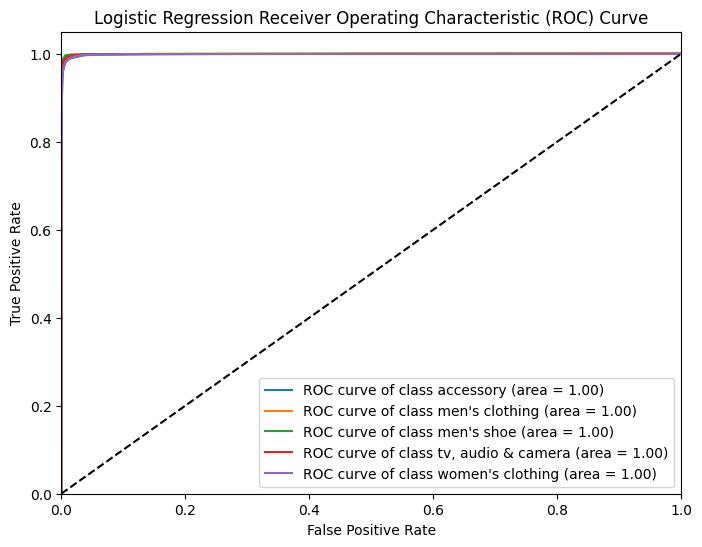

In [ ]:
y_test_bin_log_reg = label_binarize(y_test, classes=log_reg.classes_)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)

fpr_log_reg = dict()
tpr_log_reg = dict()
roc_auc_log_reg = dict()
n_classes_log_reg = len(log_reg.classes_)

for i in range(n_classes_log_reg):
    fpr_log_reg[i], tpr_log_reg[i], _ = roc_curve(y_test_bin_log_reg[:, i], y_pred_proba_log_reg[:, i])
    roc_auc_log_reg[i] = auc(fpr_log_reg[i], tpr_log_reg[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes_log_reg):
    plt.plot(fpr_log_reg[i], tpr_log_reg[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(log_reg.classes_[i], roc_auc_log_reg[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Model 2: Logistic Regression with L1 Regularization (Lasso)**


Applied Logistic Regression with L1 regularization (Lasso) to perform feature extraction promoting sparsity in the model by selecting only the most important features. The 'saga' solver was chosen for its efficiency in handling large datasets with L1 regularization and support for stochastic gradient descent.

Applied cross-validation to check for overfitting or underfitting

Various metrics such as validation accuracy, test accuracy, precision, recall, F1 score, and specificity were calculated to assess the model's performance

In [ ]:
log_reg = LogisticRegression(max_iter=1000, penalty='l1', solver='saga')
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

log_reg.fit(X_train, y_train)

val_accuracy = log_reg.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")

test_accuracy = log_reg.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy_log_reg)

precision_log_reg = precision_score(y_test, y_pred_log_reg, average='weighted')
print("Logistic Regression Precision:", precision_log_reg)

recall_log_reg = recall_score(y_test, y_pred_log_reg, average='weighted')
print("Logistic Regression Recall:", recall_log_reg)

f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted')
print("Logistic Regression F1 Score:", f1_log_reg)

cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
tn_log_reg = cm_log_reg[0, 0]
fp_log_reg = cm_log_reg[0, 1]
specificity_log_reg = tn_log_reg / (tn_log_reg + fp_log_reg) if (tn_log_reg + fp_log_reg) > 0 else 0
print("Logistic Regression Specificity:", specificity_log_reg)

Cross-Validation Scores: [0.98121349 0.98118486 0.98079604]
Mean CV Accuracy: 0.9811
Validation Accuracy: 0.9812
Test Accuracy: 0.9814
Logistic Regression Accuracy: 0.9814379283311838
Logistic Regression Precision: 0.9814548163123884
Logistic Regression Recall: 0.9814379283311838
Logistic Regression F1 Score: 0.9814383962323971
Logistic Regression Specificity: 0.9992121159065044


The Logistic Regression model demonstrates excellent performance with high accuracy (98.14%) precision (98.15%) recall (98.14%) F1 score (98.14%) and outstanding specificity (99.92%) indicating it effectively classifies the main categories while minimizing false positives

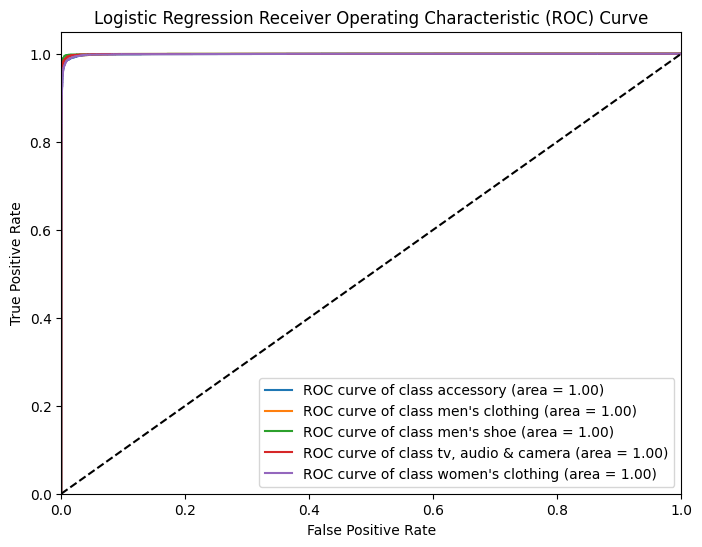

In [ ]:
y_test_bin_log_reg = label_binarize(y_test, classes=log_reg.classes_)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)

fpr_log_reg = dict()
tpr_log_reg = dict()
roc_auc_log_reg = dict()
n_classes_log_reg = len(log_reg.classes_)

for i in range(n_classes_log_reg):
    fpr_log_reg[i], tpr_log_reg[i], _ = roc_curve(y_test_bin_log_reg[:, i], y_pred_proba_log_reg[:, i])
    roc_auc_log_reg[i] = auc(fpr_log_reg[i], tpr_log_reg[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes_log_reg):
    plt.plot(fpr_log_reg[i], tpr_log_reg[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(log_reg.classes_[i], roc_auc_log_reg[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Model 3: Random Forest**

Applied Random Forest Classifier in order to leverage Ensemble technique

Applied cross-validation to check for overfitting or underfitting

Various metrics such as validation accuracy, test accuracy, precision, recall, F1 score, and specificity were calculated to assess the model's performance

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
print(f"Random Forest Cross-Validation Scores: {rf_cv_scores}")
print(f"Random Forest Mean CV Accuracy: {rf_cv_scores.mean():.4f}")

rf_model.fit(X_train, y_train)

rf_val_accuracy = rf_model.score(X_val, y_val)
print(f"Random Forest Validation Accuracy: {rf_val_accuracy:.4f}")

rf_test_accuracy = rf_model.score(X_test, y_test)
print(f"Random Forest Test Accuracy: {rf_test_accuracy:.4f}")

y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
print("Random Forest Precision:", precision_rf)

recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
print("Random Forest Recall:", recall_rf)

f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print("Random Forest F1 Score:", f1_rf)

cm_rf = confusion_matrix(y_test, y_pred_rf)
tn_rf = cm_rf[0, 0]
fp_rf = cm_rf[0, 1]
specificity_rf = tn_rf / (tn_rf + fp_rf) if (tn_rf + fp_rf) > 0 else 0
print("Random Forest Specificity:", specificity_rf)

Random Forest Cross-Validation Scores: [0.98315758 0.98365055 0.9828824 ]
Random Forest Mean CV Accuracy: 0.9832
Random Forest Validation Accuracy: 0.9862
Random Forest Test Accuracy: 0.9845
Random Forest Accuracy: 0.9845484662266394
Random Forest Precision: 0.9845673470364129
Random Forest Recall: 0.9845484662266394
Random Forest F1 Score: 0.9845498564193902
Random Forest Specificity: 0.9992130115424974


The Random Forest model achieved a test accuracy of 98.45%, with high precision and recall of 98.46%, an F1 score of 98.45%, and impressive specificity of 99.92%, demonstrating its strong effectiveness in accurately classifying the main categories

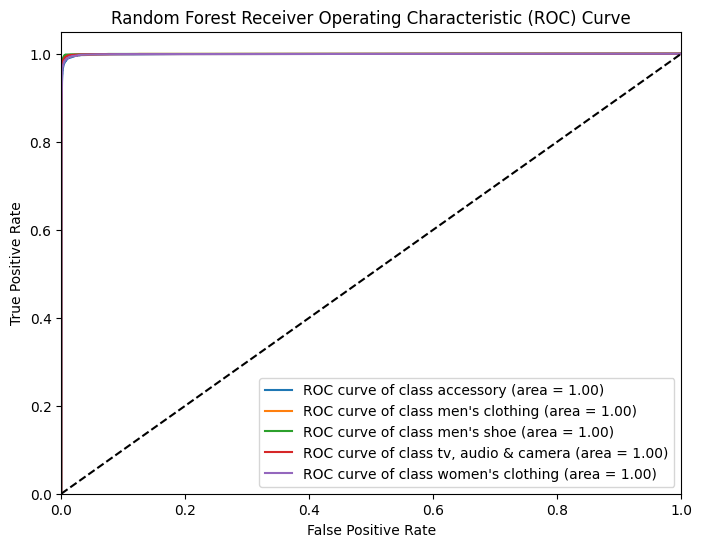

In [ ]:
y_test_bin_rf = label_binarize(y_test, classes=rf_model.classes_)
y_pred_proba_rf = rf_model.predict_proba(X_test)

fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
n_classes_rf = len(rf_model.classes_)

for i in range(n_classes_rf):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin_rf[:, i], y_pred_proba_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes_rf):
    plt.plot(fpr_rf[i], tpr_rf[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(rf_model.classes_[i], roc_auc_rf[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**In summary, all evaluated classification models—Logistic Regression , Logistic Regression(L1) and Random Forest—performed well, with Random Forest achieving the highest test accuracy of 98.45%. Each model demonstrated strong precision, recall, F1 score, and specificity, highlighting their effectiveness for classifying the `main_category`.**